In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import MinMaxScaler

https://medium.com/@praveenkotha/home-credit-default-risk-end-to-end-machine-learning-project-1871f52e3ef2

In [2]:
def keep_k_most_common(df, k):
    # Keep the k most common values in each column
    for col in df.select_dtypes(include='object').columns:
        top_k = df[col].value_counts()[:k].index
        df.loc[~df[col].isin(top_k), col] = 'Other'

    return df

def one_hot_encode(df):
    # One-hot encode categorical features
    df = pd.get_dummies(df)
    return df

load data

In [2]:
app_train = pd.read_csv('../raw-data/dseb63_application_train.csv').set_index('SK_ID_CURR')
app_train.drop(['Unnamed: 0'], axis=1, inplace=True)
app_train.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
139008,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
138348,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
64140,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
219374,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
53466,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
27272,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
218056,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
52390,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
app_train['EMERGENCYSTATE_MODE'].nunique()

2

In [6]:
app_test = pd.read_csv('../raw-data/dseb63_application_test.csv').set_index('SK_ID_CURR')
app_test.drop(['Unnamed: 0'], axis=1, inplace=True)
app_test.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
83659,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
174814,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
179486,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
57038,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
25672,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
302672,Cash loans,M,N,Y,0,85500.0,152820.0,16456.5,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
90463,Cash loans,F,N,N,1,112500.0,900000.0,24750.0,900000.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
178370,Cash loans,M,Y,Y,0,141606.0,810000.0,33120.0,810000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7865,Cash loans,F,N,Y,0,130500.0,781920.0,34443.0,675000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


In [8]:
app_test['EMERGENCYSTATE_MODE']

SK_ID_CURR
83659     NaN
174814     No
179486    NaN
57038      No
25672      No
         ... 
150442    NaN
5217      Yes
260741    NaN
284794     No
258643    NaN
Name: EMERGENCYSTATE_MODE, Length: 61502, dtype: object

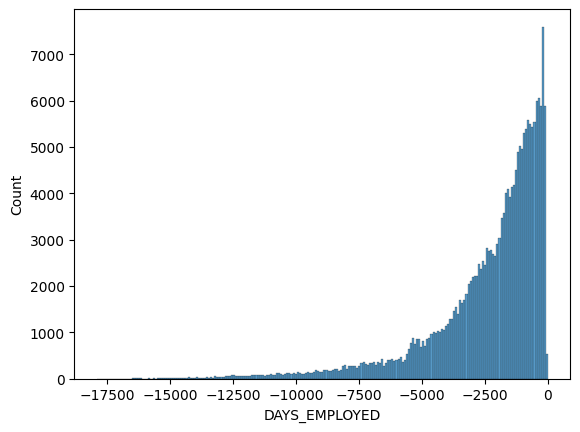

In [5]:
# histplot app_train['DAYS_EMPLOYED']
sns.histplot(app_train[app_train['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'])
plt.show()

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246009 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 229.0+ MB


check for missing values in each column.

In [4]:
(app_train.isnull().sum().sort_values(ascending=False) / len(app_train)).head(10)

COMMONAREA_AVG              0.698877
COMMONAREA_MODE             0.698877
COMMONAREA_MEDI             0.698877
NONLIVINGAPARTMENTS_AVG     0.694564
NONLIVINGAPARTMENTS_MODE    0.694564
NONLIVINGAPARTMENTS_MEDI    0.694564
FONDKAPREMONT_MODE          0.684068
LIVINGAPARTMENTS_MEDI       0.683703
LIVINGAPARTMENTS_AVG        0.683703
LIVINGAPARTMENTS_MODE       0.683703
dtype: float64

check for duplicate data

In [5]:
columns_without_id = [col for col in app_train.columns if col!='SK_ID_CURR']
app_train[app_train.duplicated(subset = columns_without_id, keep=False)]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,


plot distribution

In [6]:
len(app_train.select_dtypes('object').columns)

16

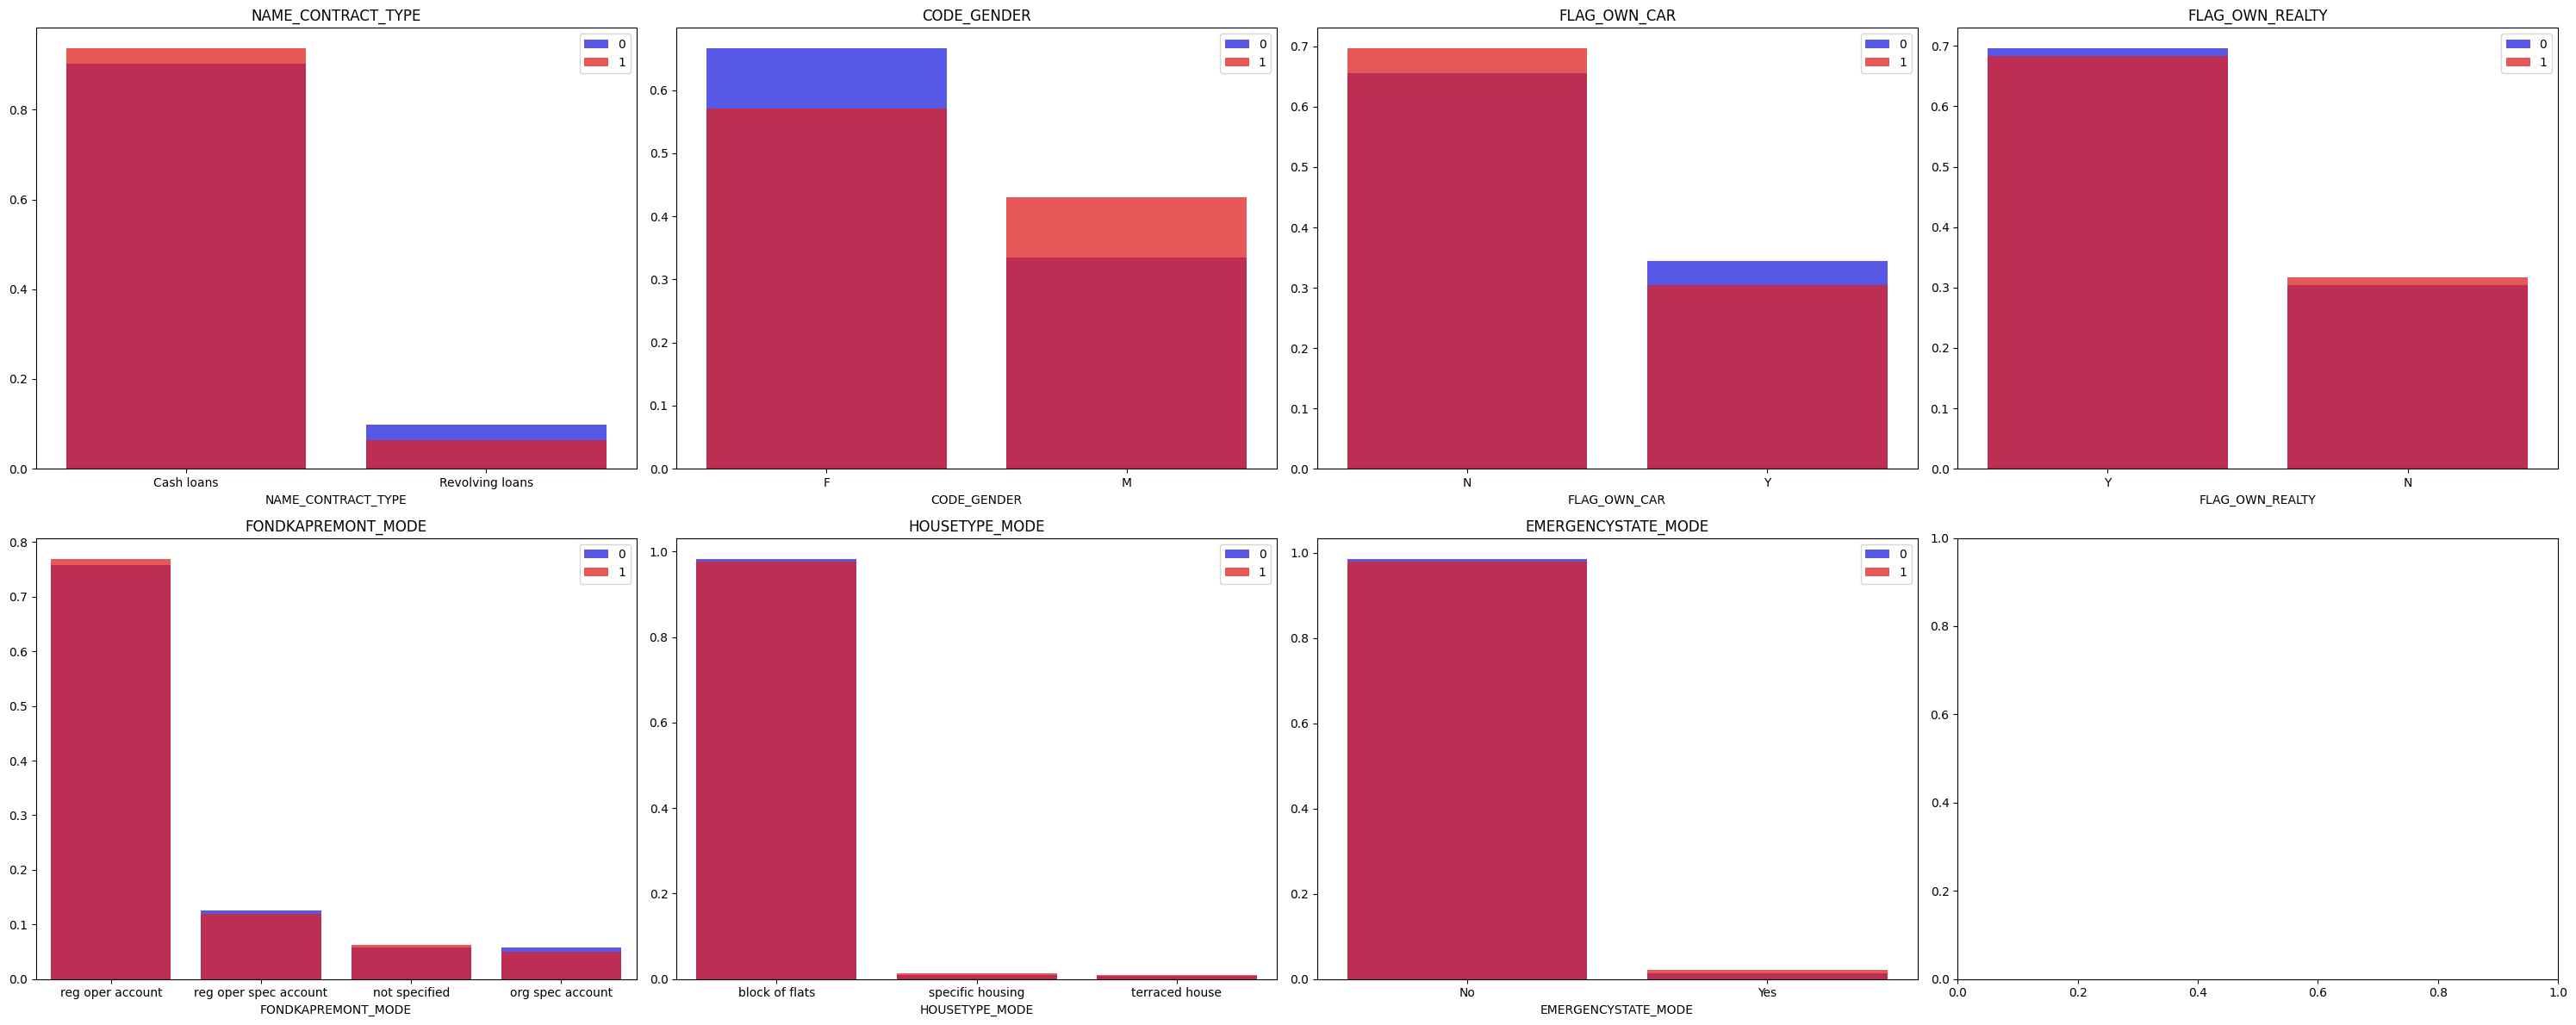

In [19]:
# sub plot distribution of each feature hue by TARGET
fig, ax = plt.subplots(2, 4, figsize=(30, 12))
cat_cols_4 = [col for col in app_train.select_dtypes('object').columns if app_train[col].nunique() <= 4]

for i, col in enumerate(cat_cols_4):
    if app_train[col].nunique() <= 4:
        value0 = app_train[app_train['TARGET'] == 0][col].value_counts(normalize=True)
        value1 = app_train[app_train['TARGET'] == 1][col].value_counts(normalize=True)

        sns.barplot(x=value0.index, y=value0.values, ax=ax[i//4][i%4], label='0', alpha=0.75, color='blue')
        sns.barplot(x=value1.index, y=value1.values, ax=ax[i//4][i%4], label='1', alpha=0.75, color='red')

        ax[i//4][i%4].set_title(col)
        ax[i//4][i%4].legend()

plt.tight_layout()
plt.show()



1. Many people are willing to take cash loan than revolving loan.


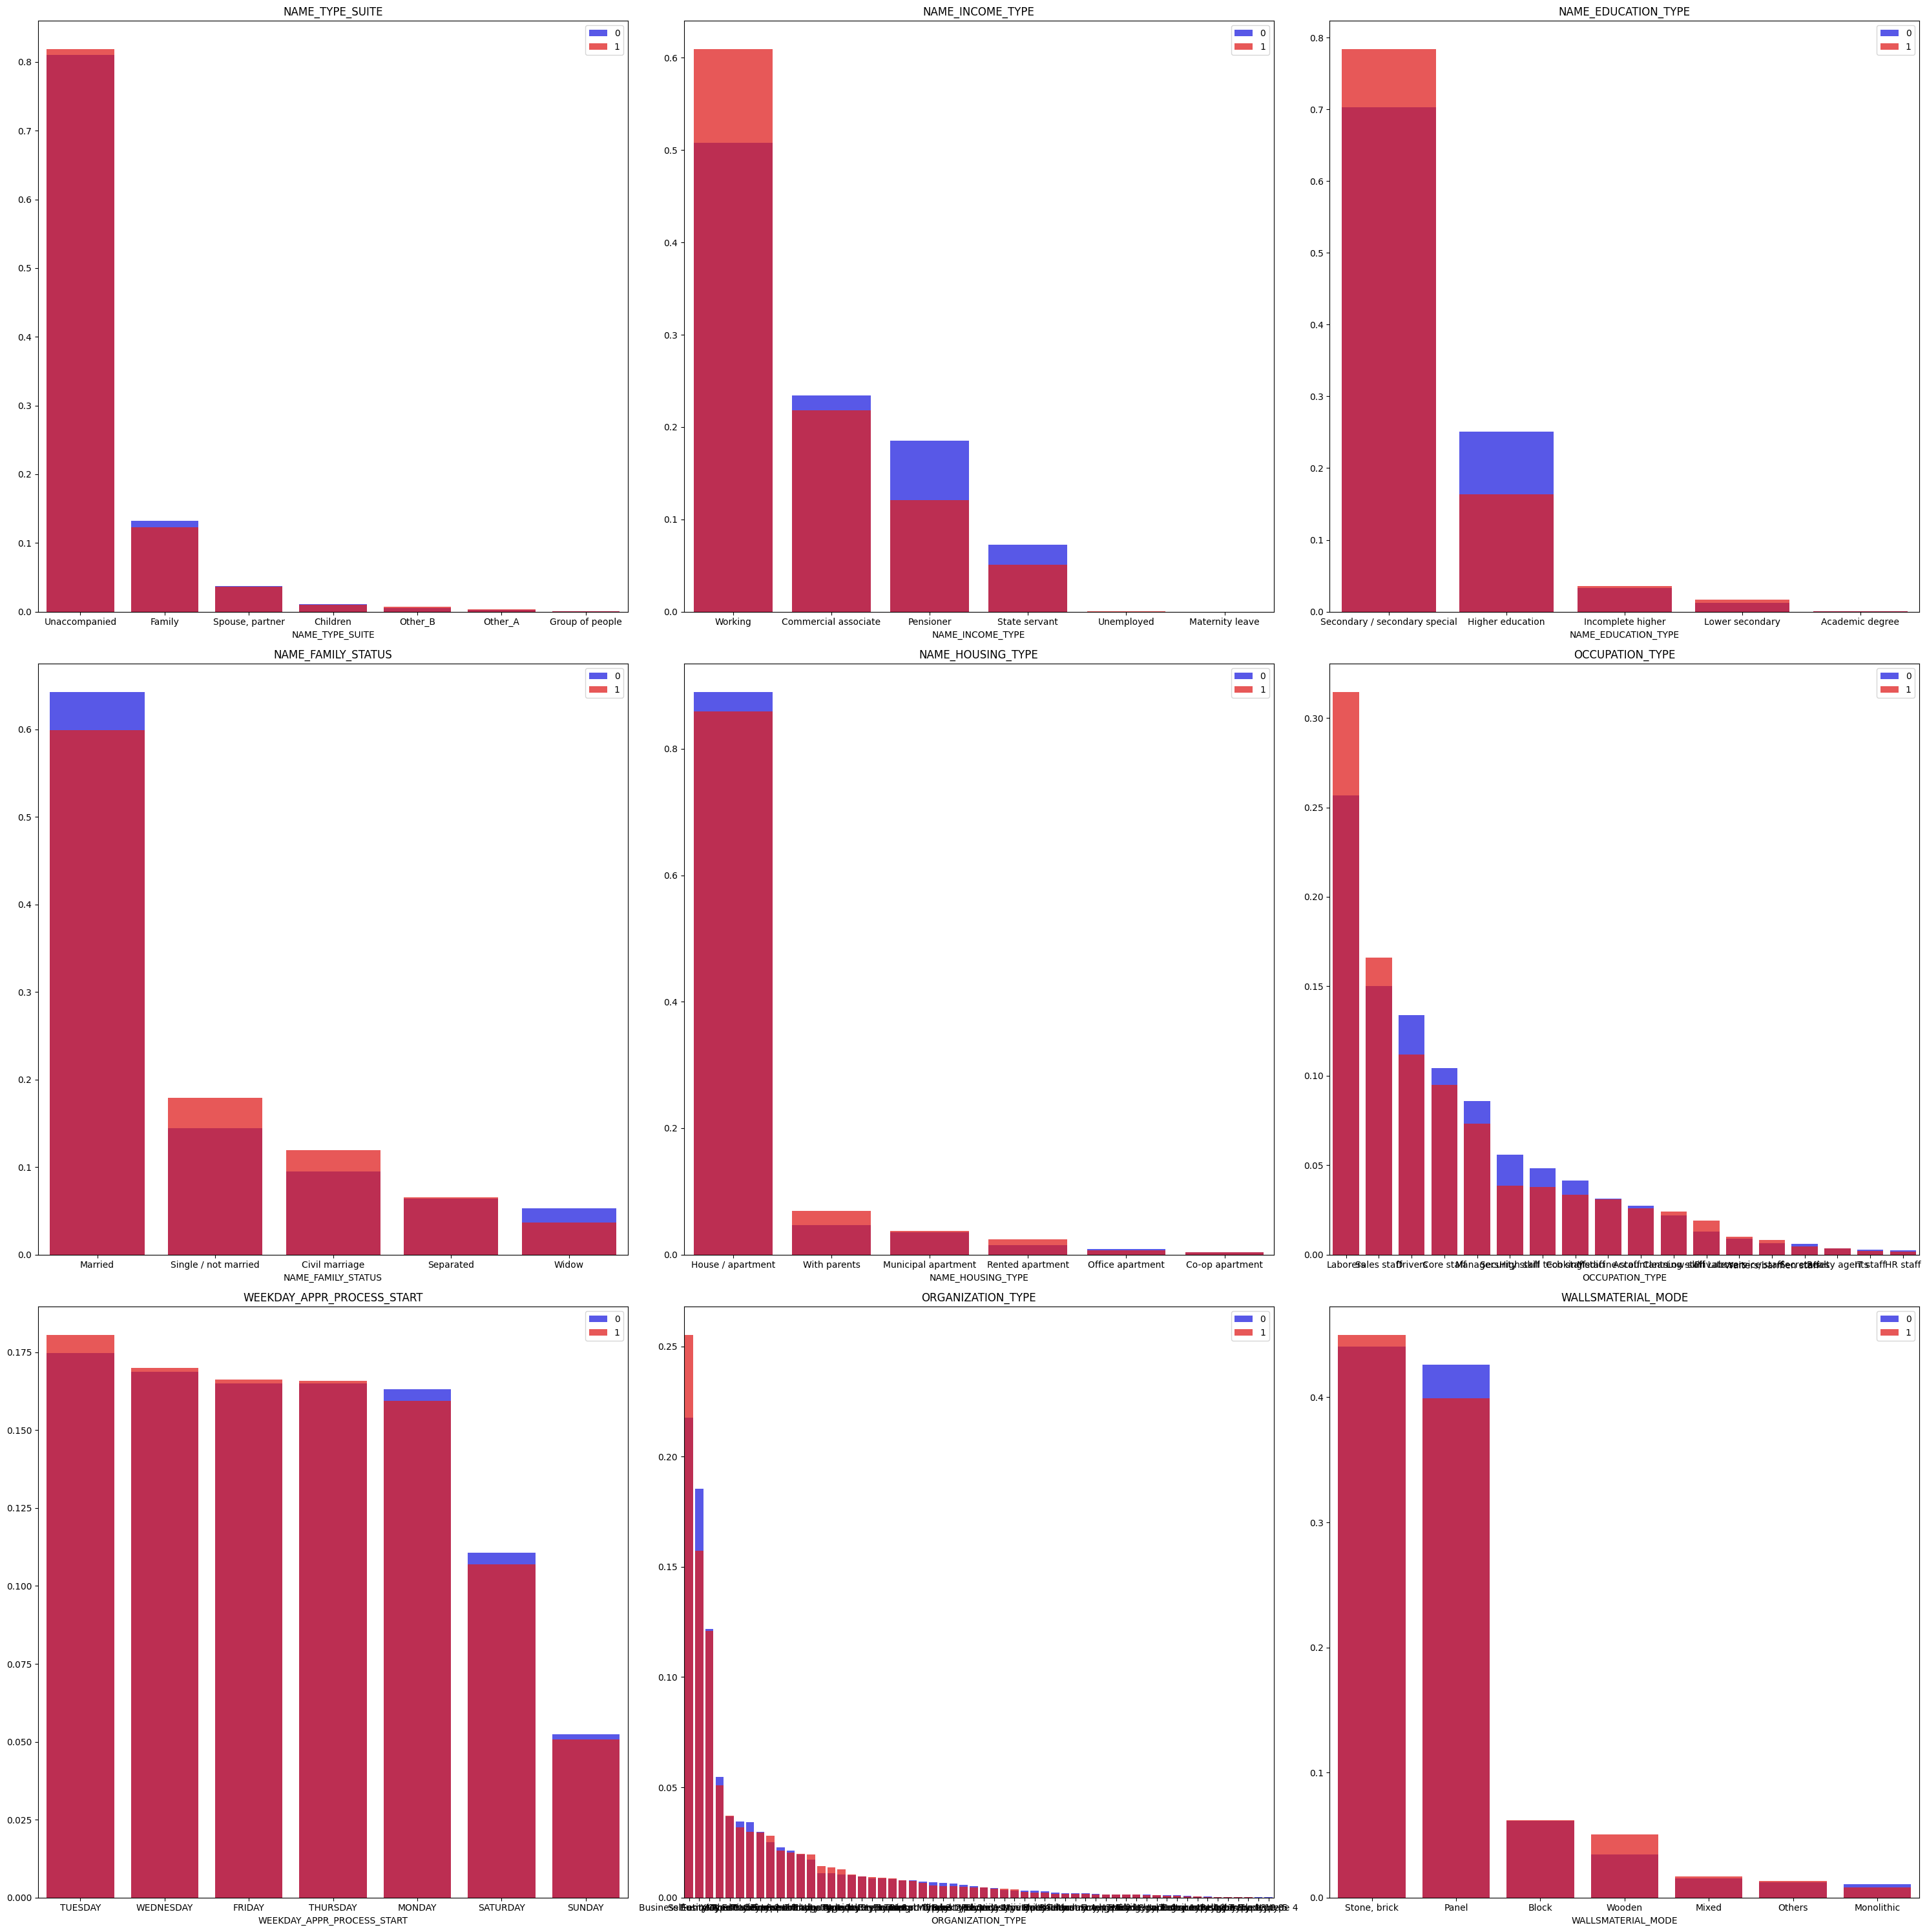

In [24]:
# sub plot distribution of each feature hue by TARGET
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
cat_cols_rest = [col for col in app_train.select_dtypes('object').columns if app_train[col].nunique() > 4]

for i, col in enumerate(cat_cols_rest):
    if app_train[col].nunique() > 4:
        value0 = app_train[app_train['TARGET'] == 0][col].value_counts(normalize=True)
        value1 = app_train[app_train['TARGET'] == 1][col].value_counts(normalize=True)

        sns.barplot(x=value0.index, y=value0.values, ax=ax[i//3][i%3], label='0', alpha=0.75, color='blue')
        sns.barplot(x=value1.index, y=value1.values, ax=ax[i//3][i%3], label='1', alpha=0.75, color='red')

        ax[i//3][i%3].set_title(col)
        ax[i//3][i%3].legend()

plt.tight_layout()
plt.show()

### numerical feature distribution

`AMT_INCOME_TOTAL`

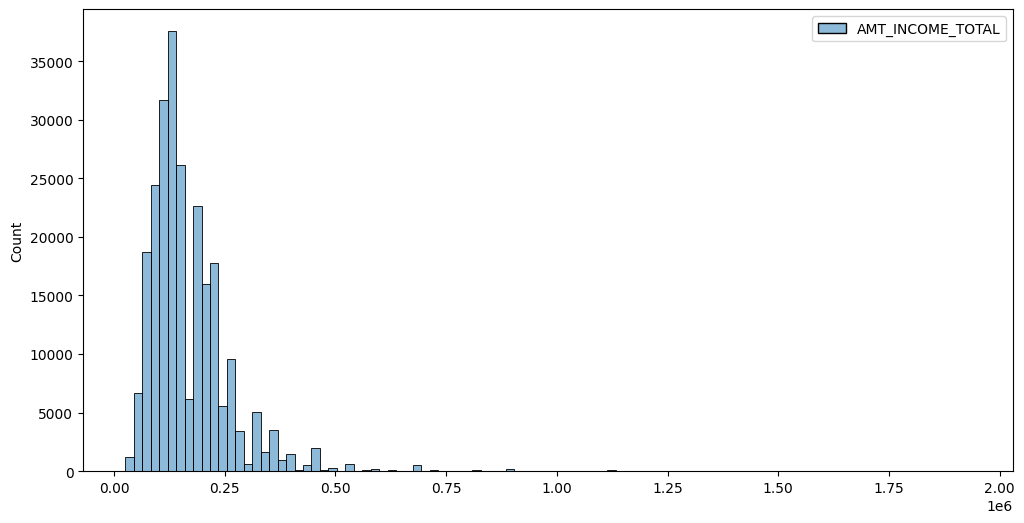

In [34]:
# AMT_INCOME_TOTAL
plt.subplots(figsize=(12, 6))
sns.histplot(app_train[app_train['AMT_INCOME_TOTAL'] < 2_000_000][['AMT_INCOME_TOTAL']] , bins=100)
plt.show()

In [37]:
app_train[app_train['AMT_INCOME_TOTAL'] > 1_000_000]['TARGET'].value_counts(normalize=True)

TARGET
0    0.951923
1    0.048077
Name: proportion, dtype: float64

Observations:
1. The distribution is right skewed and there are extreme values, we can apply log distribution.
2. People with high income(>1000000) are likely to repay the loan.

`AMT_CREDIT`

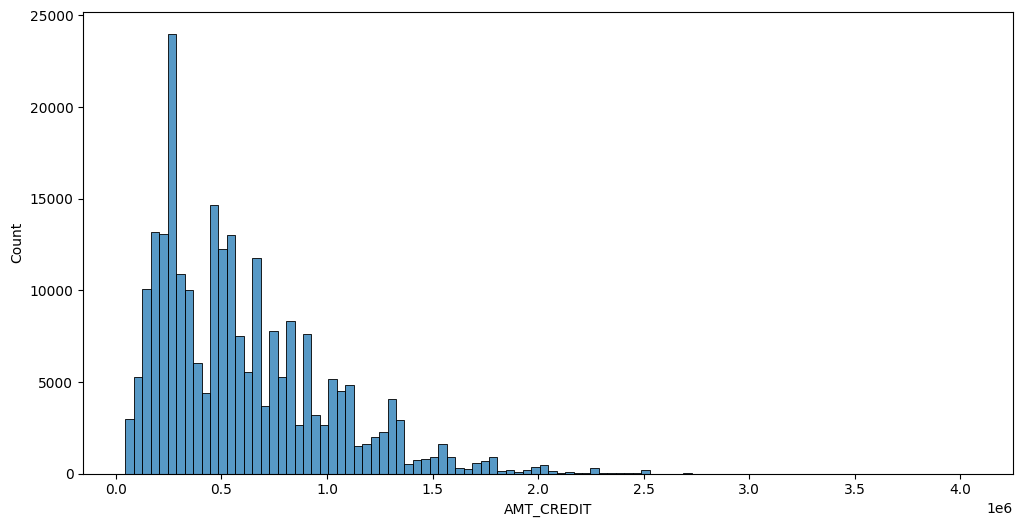

In [39]:
plt.subplots(figsize=(12, 6))
sns.histplot(app_train['AMT_CREDIT'], bins=100)
plt.show()

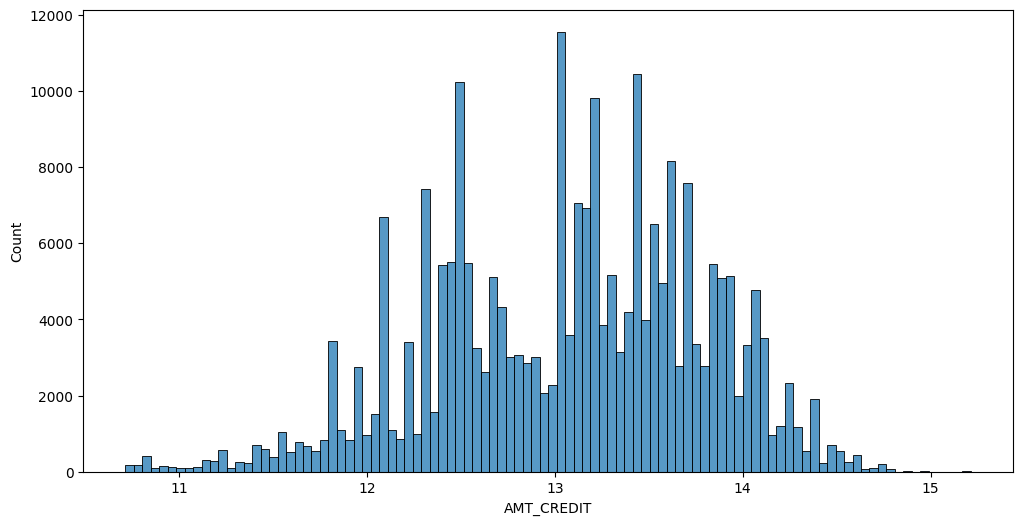

: 

In [42]:
# log transform
plt.subplots(figsize=(12, 6))
sns.histplot(app_train['AMT_CREDIT'].apply(np.log), bins=100)
plt.show()

Observations:
1. People who are taking credit for large amount are very likely to repay the loan.
2. Originally the distribution is right skewed, we used log transformation to make it normal distributed.

In [4]:
for col in app_train.select_dtypes('object').columns:
    print(f'{col}: {app_train[col].unique()}')

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F' 'XNA']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Group of people'
 'Other_A' nan 'Other_B']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Businessman' 'Student' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Incomplete higher' 'Higher education' 'Secondary / secondary special'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Separated' 'Civil marriage' 'Widow'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Office apartment' 'Co-op apartment'
 'Municipal apartment' 'With parents' 'Rented apartment']
OCCUPATION_TYPE: [nan 'Accountants' 'Cleaning staff' 'Medicine staff' 'Managers' 'Laborers'
 'Sales staff' 'High skill tech staff' 'Drivers' 'Core staff'
 'Realty agents' 'Cooking staff' 'Security staff' 'Secretaries'
 'Low-skill Laborers' 'IT s

In [5]:
app_train.select_dtypes('number').describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,...,246009.000000,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000
mean,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,...,0.008130,0.000581,0.000496,0.000309,0.006480,0.006729,0.034211,0.266647,0.266920,1.901127
std,0.272519,0.720664,1.045297e+05,4.030980e+05,14510.634712,3.700520e+05,0.013818,4361.265483,141306.376949,3521.391396,...,0.089798,0.024103,0.022264,0.017574,0.084239,0.106693,0.204336,0.911957,0.834132,1.870269
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19682.000000,-2758.000000,-7482.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15755.000000,-1212.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12418.000000,-288.000000,-2006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [25]:
# join train and test data
app_train['is_train'] = 1
app_test['is_train'] = 0
app_test['TARGET'] = np.nan
app = pd.concat([app_train, app_test], axis=0)
app.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_train
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
139008,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
138348,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
64140,0.0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1
219374,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
# drop columns with too many missing values
missing_threshold = 0.6
missing_values = app.isnull().sum() / len(app)
missing_columns = missing_values[missing_values > missing_threshold].index
app.drop(missing_columns, axis=1, inplace=True)
app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_train
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
139008,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
138348,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
64140,0.0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1
219374,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
cols_with_null = app.columns[app.isnull().any()]
new_cols = [col + '_is_missing' for col in cols_with_null]

indicator = MissingIndicator(features='all')
missing_columns_df = pd.DataFrame(indicator.fit_transform(app[cols_with_null]), columns=new_cols, index=app.index)

app = pd.concat([app, missing_columns_df], axis=1)
app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE_is_missing,OBS_60_CNT_SOCIAL_CIRCLE_is_missing,DEF_60_CNT_SOCIAL_CIRCLE_is_missing,DAYS_LAST_PHONE_CHANGE_is_missing,AMT_REQ_CREDIT_BUREAU_HOUR_is_missing,AMT_REQ_CREDIT_BUREAU_DAY_is_missing,AMT_REQ_CREDIT_BUREAU_WEEK_is_missing,AMT_REQ_CREDIT_BUREAU_MON_is_missing,AMT_REQ_CREDIT_BUREAU_QRT_is_missing,AMT_REQ_CREDIT_BUREAU_YEAR_is_missing
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,False,False,False,False,False,False,False,False,False,False
139008,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,False,False,False,False,True,True,True,True,True,True
138348,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,False,False,False,False,False,False,False,False,False,False
64140,0.0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,False,False,False,False,False,False,False,False,False,False
219374,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# fill mode for categorical features
for col in app.select_dtypes('object').columns:
    app[col] = app[col].fillna(app[col].mode()[0])

# fill mean for numerical features
for col in app.select_dtypes('number').columns:
    app[col] = app[col].fillna(app[col].mean())
    
app.isnull().sum().sum()

0

In [30]:
# app = keep_k_most_common(app, 3)
app = one_hot_encode(app)
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,False,True,False,False,False,False,False,False,True,False
139008,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,True,False,False,True,False
138348,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,True,False,False,True,False
64140,0.0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,False,False,False,False,False,True,False,False,True,False
219374,0.0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,False,False,False,False,False,True,False,False,True,False


In [31]:
# min max scaling
scaler = MinMaxScaler()
app = pd.DataFrame(scaler.fit_transform(app), columns=app.columns, index=app.index)
app.head()


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
278621,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,0.951929,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139008,0.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,0.601451,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
138348,0.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,0.825268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64140,0.0,0.0,0.000627,0.111235,0.101018,0.103255,0.491595,0.467193,0.042604,0.798557,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
219374,0.0,0.0,0.002858,0.370787,0.157792,0.371493,0.039215,0.359583,0.045577,0.813675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
train = app[app['is_train'] == 1]
test = app[app['is_train'] == 0]

X = train.drop(['TARGET', 'is_train'], axis=1)
y = train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='newton-cholesky')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict_proba(X_test)[:, 1]
2*roc_auc_score(y_test, y_pred)-1

0.5049666586149539

In [33]:
submission = pd.DataFrame({'SK_ID_CURR': test.index, 'TARGET': log_reg.predict_proba(test.drop(['TARGET', 'is_train'], axis=1))[:, 1]})
submission.head()

,SK_ID_CURR,TARGET
0,83659,0.733618
1,174814,0.258753
2,179486,0.636108
3,57038,0.137109
4,25672,0.435251


In [34]:
len(submission)

61502

In [35]:
submission.set_index('SK_ID_CURR', inplace=True)
submission.sort_index(inplace=True)
submission.head()

,TARGET
SK_ID_CURR,
5,0.176977
13,0.533900
16,0.479671
19,0.783525
25,0.499338


In [36]:
submission.to_csv('../submissions.csv')